In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [9]:
df1 = pd.read_csv("rawData/SpotifyAudioFeaturesApril2019.csv")
df2 = pd.read_csv("rawData/SpotifyAudioFeaturesNov2018.csv")

In [10]:
df1.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0

In [11]:
df2.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          44  
1       0.4570  159.009               4    0.371          10  
2       0.0454  114.966               4    0.382          63  
3       0.0701  123.003               4    0.641           9  
4       0.0661  120.047               4    0.928           8

In [12]:
print(df1.shape)
df2.shape

(130663, 17)


(116372, 17)

In [13]:
!cwd

'cwd' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
df1.corr()

acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.360462     0.033426 -0.710067   
danceability         -0.360462      1.000000    -0.126781  0.286196   
duration_ms           0.033426     -0.126781     1.000000 -0.019885   
energy               -0.710067      0.286196    -0.019885  1.000000   
instrumentalness      0.272685     -0.305112     0.029124 -0.301308   
key                  -0.019987      0.021123    -0.001880  0.039843   
liveness             -0.100545     -0.137377    -0.003661  0.209448   
loudness             -0.603366      0.431554    -0.018595  0.766697   
mode                  0.067171     -0.057912     0.010321 -0.069263   
speechiness          -0.119231      0.248192    -0.101955  0.105078   
tempo                -0.216328      0.081791    -0.009657  0.229930   
time_signature       -0.165319      0.206328     0.021007  0.165030   
valence              -0.177023      0.461468    -0.141837  0.314768   
popularity           -0.116520      0.131086    -0.000801  0.122506   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.272685 -0.019987 -0.100545 -0.603366  0.067171   
danceability             -0.305112  0.021123 -0.137377  0.431554 -0.057912   
duration_ms               0.029124 -0.001880 -0.003661 -0.018595  0.010321   
energy                   -0.301308  0.039843  0.209448  0.766697 -0.069263   
instrumentalness          1.000000 -0.025072 -0.058390 -0.508519 -0.002211   
key                      -0.025072  1.000000  0.009191  0.028101 -0.176238   
liveness                 -0.058390  0.009191  1.000000  0.062168 -0.001325   
loudness                 -0.508519  0.028101  0.062168  1.000000 -0.036081   
mode                     -0.002211 -0.176238 -0.001325 -0.036081  1.000000   
speechiness              -0.217359  0.010354  0.106801  0.074456 -0.053554   
tempo                    -0.086894  0.005464 -0.009126  0.223067 -0.000249   
time_signature           -0.084223  0.008878 -0.018307  0.179679 -0.036244   
valence                  -0.246869  0.043348 -0.007800  0.319881  0.011082   
popularity               -0.216447  0.002682 -0.031174  0.244088 -0.009070   

                  speechiness     tempo  time_signature   valence  popularity  
acousticness        -0.119231 -0.216328       -0.165319 -0.177023   -0.116520  
danceability         0.248192  0.081791        0.206328  0.461468    0.131086  
duration_ms         -0.101955 -0.009657        0.021007 -0.141837   -0.000801  
energy               0.105078  0.229930        0.165030  0.314768    0.122506  
instrumentalness    -0.217359 -0.086894       -0.084223 -0.246869   -0.216447  
key                  0.010354  0.005464        0.008878  0.043348    0.002682  
liveness             0.106801 -0.009126       -0.018307 -0.007800   -0.031174  
loudness             0.074456  0.223067        0.179679  0.319881    0.244088  
mode                -0.053554 -0.000249       -0.036244  0.011082   -0.009070  
speechiness          1.000000  0.054827        0.053707  0.121552   -0.000214  
tempo                0.054827  1.000000        0.083759  0.104857    0.037075  
time_signature       0.053707  0.083759        1.000000  0.069162    0.064939  
valence              0.121552  0.104857        0.069162  1.000000    0.014303  
popularity          -0.000214  0.037075        0.064939  0.014303    1.000000

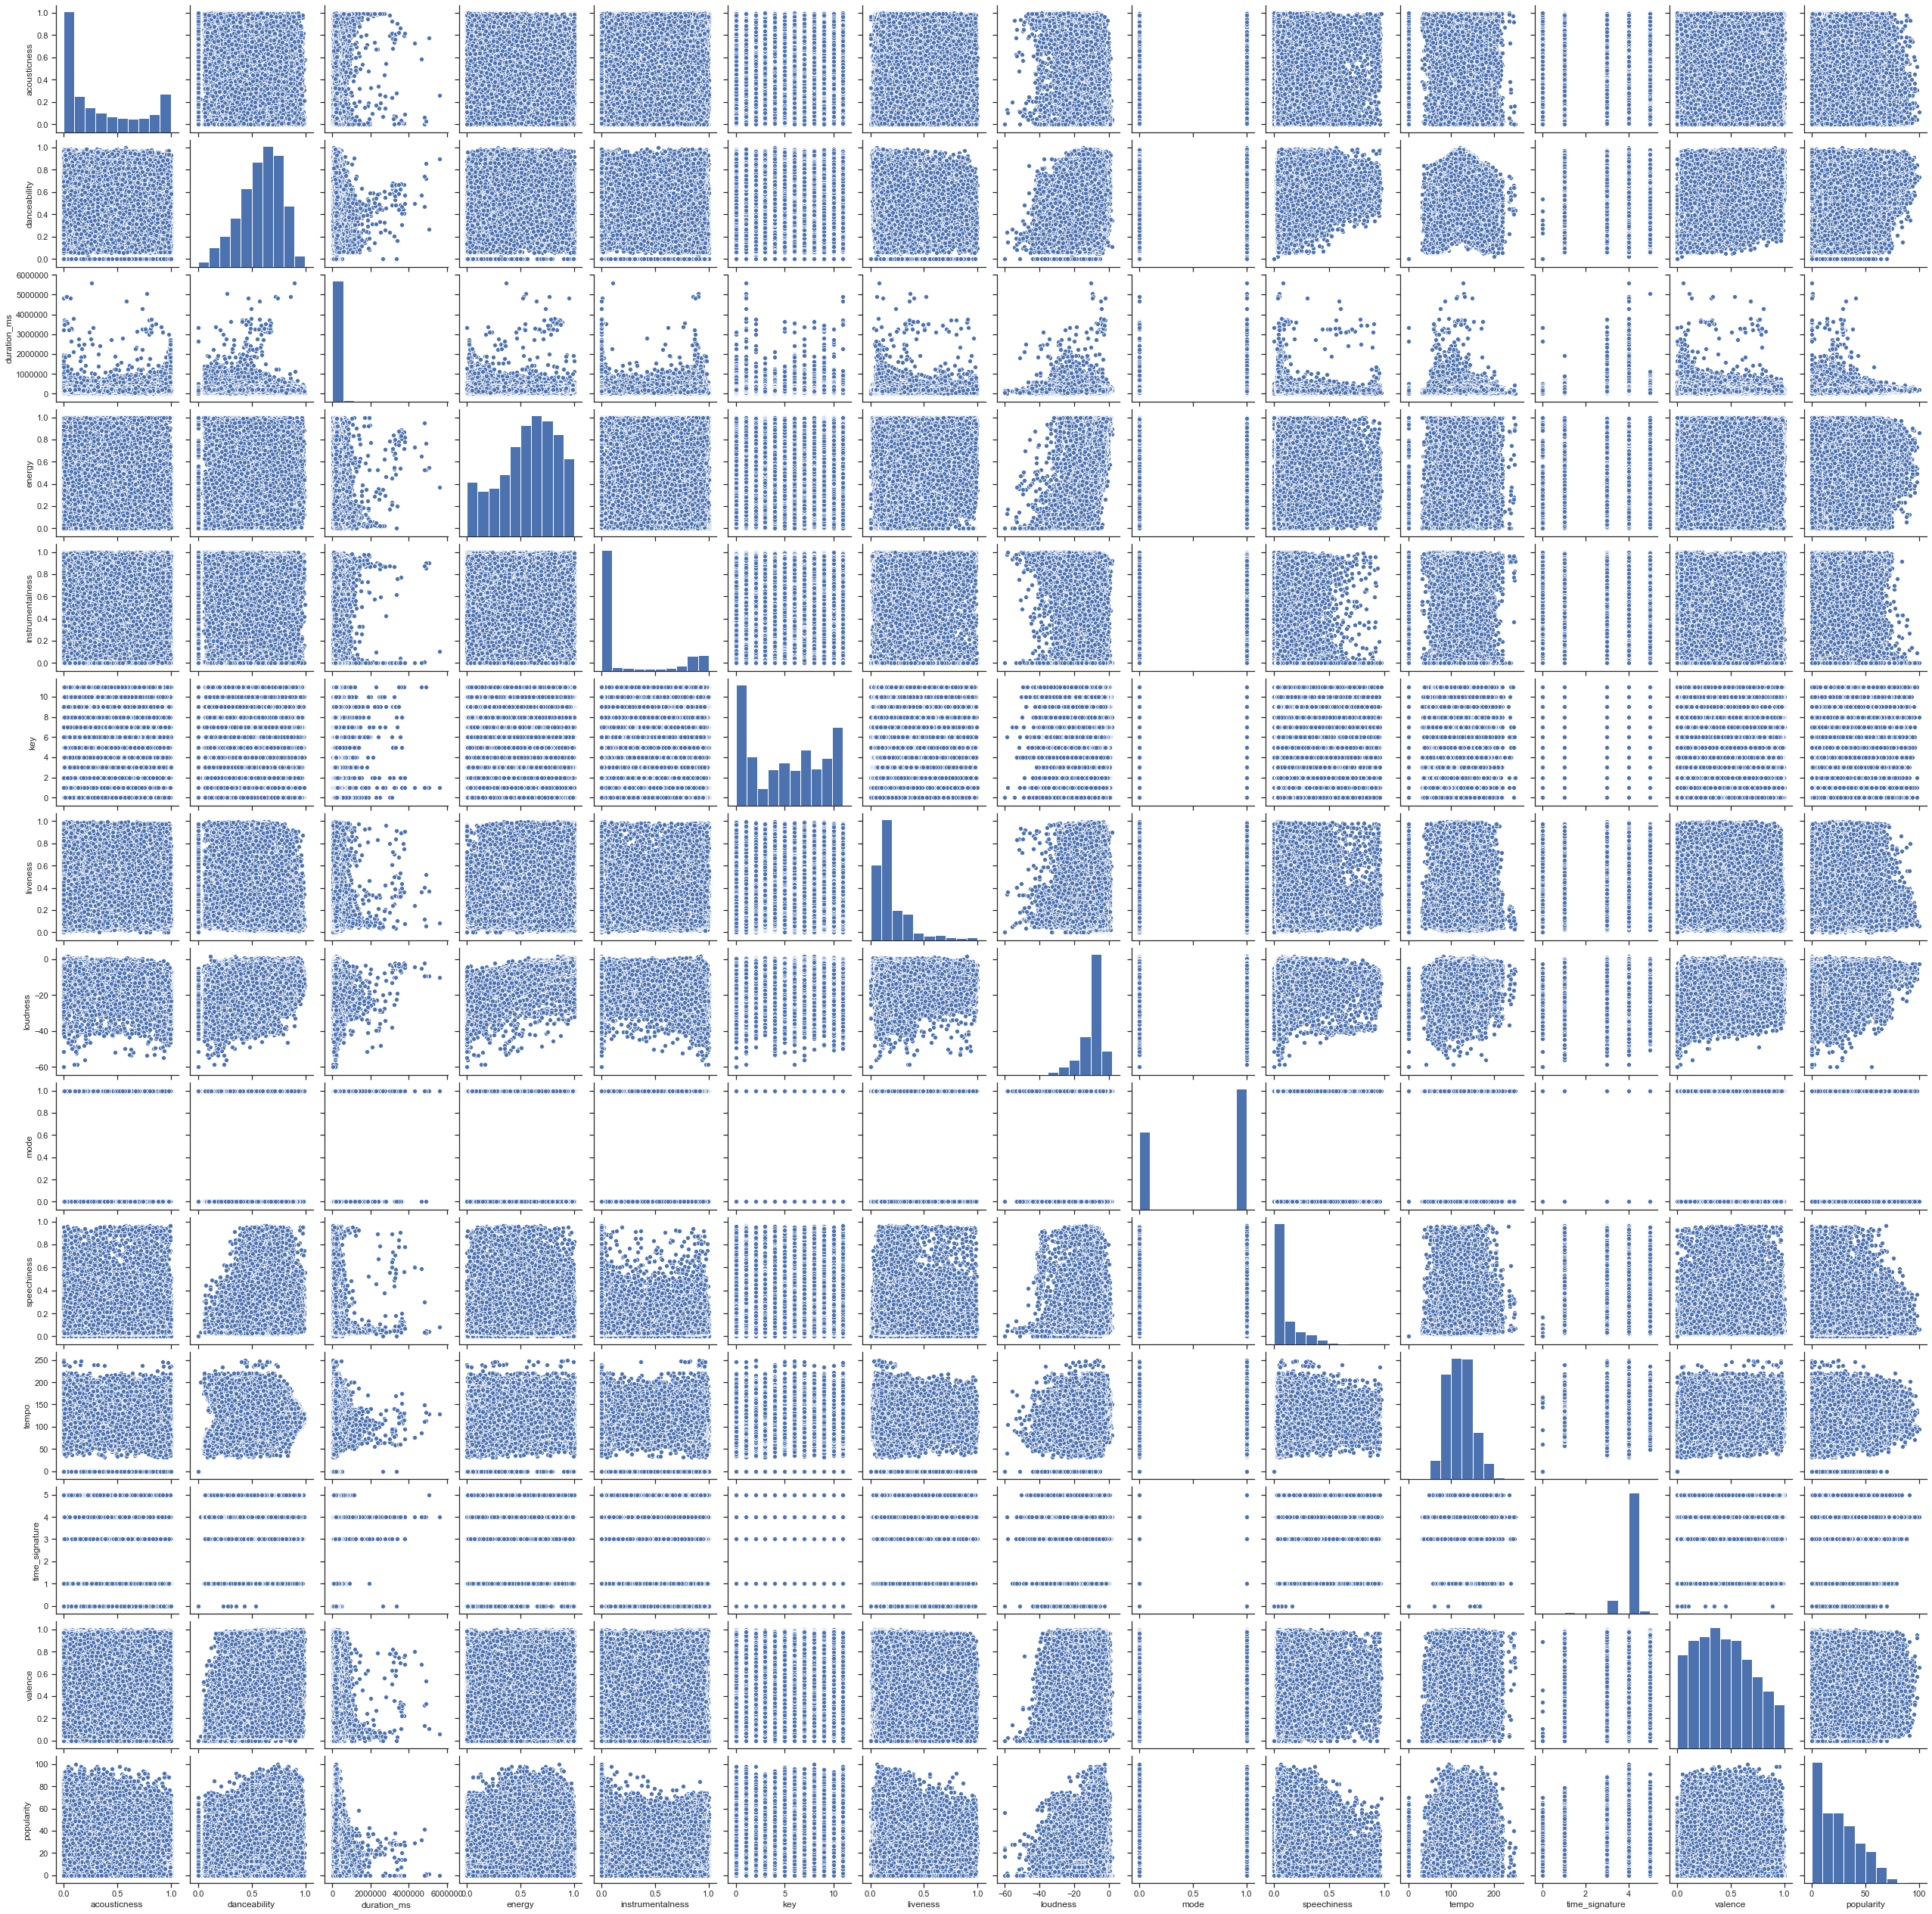

In [15]:
sns.set(style="ticks", color_codes=True)
graph = sns.pairplot(df1)

In [16]:
profile = ProfileReport(train, minimal=True).to_notebook_iframe()
profile

NameError: name 'ProfileReport' is not defined

In [17]:
df1.describe()

acousticness   danceability   duration_ms         energy  \
count  130663.000000  130663.000000  1.306630e+05  130663.000000   
mean        0.342500       0.581468  2.126331e+05       0.569196   
std         0.345641       0.190077  1.231551e+05       0.260312   
min         0.000000       0.000000  3.203000e+03       0.000000   
25%         0.031600       0.459000  1.639225e+05       0.396000   
50%         0.203000       0.605000  2.019010e+05       0.603000   
75%         0.636000       0.727000  2.410475e+05       0.775000   
max         0.996000       0.996000  5.610020e+06       1.000000   

       instrumentalness            key       liveness       loudness  \
count     130663.000000  130663.000000  130663.000000  130663.000000   
mean           0.224018       5.231894       0.194886      -9.974006   
std            0.360328       3.602701       0.167733       6.544379   
min            0.000000       0.000000       0.000000     -60.000000   
25%            0.000000       2.000000       0.097500     -11.898000   
50%            0.000149       5.000000       0.124000      -7.979000   
75%            0.440000       8.000000       0.236000      -5.684000   
max            1.000000      11.000000       0.999000       1.806000   

                mode    speechiness          tempo  time_signature  \
count  130663.000000  130663.000000  130663.000000   130663.000000   
mean        0.607739       0.112015     119.473353        3.878986   
std         0.488256       0.124327      30.159636        0.514403   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.038900      96.014000        4.000000   
50%         1.000000       0.055900     120.027000        4.000000   
75%         1.000000       0.129000     139.642000        4.000000   
max         1.000000       0.966000     249.983000        5.000000   

             valence     popularity  
count  130663.000000  130663.000000  
mean        0.439630      24.208988  
std         0.259079      19.713191  
min         0.000000       0.000000  
25%         0.224000       7.000000  
50%         0.420000      22.000000  
75%         0.638000      38.000000  
max         1.000000     100.000000

In [18]:
print(df1.shape)
df1["track_id"].nunique()

(130663, 17)


130326

In [19]:
df1 = df1.drop_duplicates(["track_id"])

In [20]:
df1["popularity"].describe()

count    130326.000000
mean         24.130573
std          19.662458
min           0.000000
25%           7.000000
50%          21.000000
75%          38.000000
max         100.000000
Name: popularity, dtype: float64

In [22]:
features = df1.columns.drop(["artist_name", "track_id", "track_name"])
X = df1[features]

In [5]:
df1["key"] = df1["key"].astype('category')
df1_encoded = ce.OneHotEncoder(df1)


NameError: name 'df1' is not defined

In [23]:
nbrs = NearestNeighbors(n_neighbors=3).fit(X)

In [24]:
nbrs

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [25]:
df = pd.read_spss("https://github.com/spotify-song-suggester-6/data-science/blob/ray/FlaskApp/web_app/model(v0).sav")

ImportError: Missing optional dependency 'pyreadstat'.  Use pip or conda to install pyreadstat.